In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [4]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 24

# Dataset reading

In [8]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [9]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [10]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

model =  tf.keras.models.Sequential([
     tf.keras.layers.Input((21 * 2, )),
    
    # First dense layer with batch normalization and dropout
     tf.keras.layers.Dense(100, activation=None),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.ReLU(),
     tf.keras.layers.Dropout(0.2),
    
    # Second dense layer with batch normalization and dropout
     tf.keras.layers.Dense(50, activation=None),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.ReLU(),
     tf.keras.layers.Dropout(0.2),
    
    # Third dense layer with batch normalization and dropout
     tf.keras.layers.Dense(20, activation=None),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.ReLU(),
     tf.keras.layers.Dropout(0.2),
    
    # Output layer
     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [11]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 100)                 │           4,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 20)                  │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 24)                  │             504 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,554 (45.13 KB)

 Trainable params: 11,214 (43.80 KB)

 Non-trainable params: 340 (1.33 KB)

In [12]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [13]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [14]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
37/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0782 - loss: 3.3169
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.0815 - loss: 3.2990 - val_accuracy: 0.0833 - val_loss: 3.1516
Epoch 2/1000
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1633 - loss: 2.8817
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1658 - loss: 2.8745 - val_accuracy: 0.0800 - val_loss: 3.1081
Epoch 3/1000
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2566 - loss: 2.5869
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2585 - loss: 2.5818 - val_accuracy: 0.1474 - val_loss: 3.0186
Epoch 4/1000
39/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3594 - loss: 2.2880
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
43

In [15]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9029 - loss: 0.3106 


In [16]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [17]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
[1.6034464e-03 5.9555721e-04 2.7257940e-04 1.8968392e-05 4.1461826e-04
 3.0122425e-03 1.4347995e-03 8.4123538e-05 3.5544697e-02 3.4354001e-03
 4.2893272e-03 1.4404372e-04 4.0137061e-01 5.6045310e-04 1.7725276e-02
 2.3707155e-04 4.7132567e-02 1.2906157e-02 1.9676719e-02 2.2350762e-03
 3.8514236e-01 2.5525555e-04 1.2122359e-02 4.9786445e-02]
12


# Confusion matrix

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


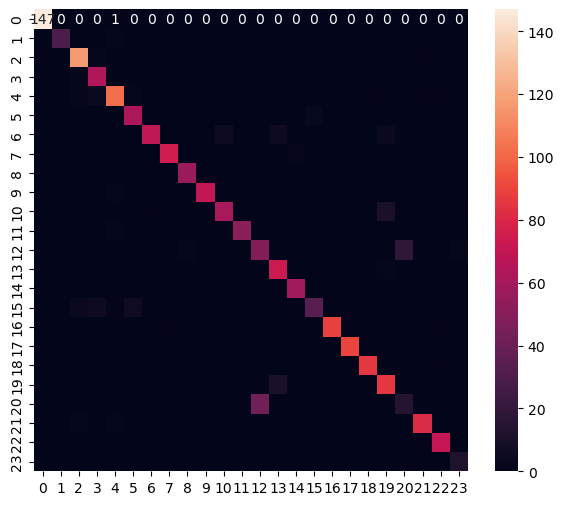

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       1.00      0.94      0.97        31
           2       0.91      0.94      0.92       124
           3       0.85      0.97      0.91        66
           4       0.89      0.89      0.89       115
           5       0.88      0.93      0.90        68
           6       0.99      0.83      0.90        84
           7       0.99      0.96      0.97        78
           8       0.95      0.97      0.96        58
           9       1.00      0.96      0.98        73
          10       0.91      0.81      0.86        75
          11       0.98      0.96      0.97        54
          12       0.53      0.68      0.60        71
          13       0.83      0.96      0.89        76
          14       0.97      0.98      0.98        60
          15       0.89      0.65      0.76        52
          16       0.97      0.98      0.97        90
     

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [19]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\metua\AppData\Local\Temp\tmptd91bm54\assets


INFO:tensorflow:Assets written to: C:\Users\metua\AppData\Local\Temp\tmptd91bm54\assets


# Inference test

In [5]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [6]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [11]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [12]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2 ms


In [13]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.2705443e-01 7.4859136e-01 2.4354095e-02 1.1261292e-07]
1
